Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Prabhjeet Singh"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [193]:
import pandas as pd

df = pd.read_csv('cereal.csv')
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


Question1:

In [194]:
df['Type of Cereal'] =df['name']
df.drop('name', axis=1, inplace=True)
df.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,100% Bran
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,100% Natural Bran


In [195]:
def updateName(name):
    if 'Bran' in name:
        name = 'Bran'
    elif 'Wheat' in name:
        name = 'Wheat'
    elif 'Fiber' in name:
        name = 'Fiber'
    elif 'Protein' in name:
        name = 'Protein'
    elif 'Crunch' in name:
        name = 'Crunch'
    elif 'Corn' in name:
        name = 'Corn'
    elif 'Nut' in name:
        name = 'Nut'
    elif 'Rice' in name:
        name = 'Rice'
    else:
        name = 'Other' 

    return name

df['Type of Cereal'] = df['Type of Cereal'].apply(updateName)
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


Question 2

In [196]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [197]:
cols = df.select_dtypes(exclude=[object])
for col in cols:
    if df[col].min() < 0:
       df.loc[df[col] < 0, col] = df[col].median()

In [198]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Question 3

In [199]:
def standardizeWeight(df, locations):
    cols = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']
    for i in locations:
        for col in cols:
            df.at[i, col] /= df.at[i, 'weight']
        df.at[i, 'weight'] = 1

In [102]:
df[df['weight'] > 1]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
7,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,Basic 4
27,P,C,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67,40.917047,Fruit & Fibre Dates; Walnuts; and Oats
28,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492,Fruitful Bran
39,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,36.471512,Just Right Fruit & Nut
46,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,Mueslix Crispy Blend
49,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320,Nutri-Grain Almond-Raisin
51,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843,Oatmeal Raisin Crisp
52,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,Post Nat. Raisin Bran
58,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197,Raisin Bran
70,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785,Total Raisin Bran


In [200]:
locations = df[df['weight'] > 1].index.to_numpy()
standardizeWeight(df, locations)
df[df['weight'] > 1]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal


Question 4

In [201]:
import numpy as np
df['Healthy'] = np.where((df['calories'] < 100) & (df['sodium'] < 150) & (df['sugars'] < 9) & (df['fiber'] > 3) & (df['protein'] > 2), 1, 0)

In [202]:
df[df['Healthy'] == 1]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,Healthy
0,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,1
3,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,1
27,P,C,96.0,2.4,1.6,128.0,4.0,9.6,8.0,160.0,20.0,3,1.0,0.67,40.917047,Other,1
64,N,C,90.0,3.0,0.0,0.0,4.0,19.0,0.0,140.0,0.0,1,1.0,0.67,74.472949,Bran,1


Questin 5

In [203]:
df.groupby(['mfr','Healthy']).agg({'Healthy':'count'})

Healthy
mfr Healthy         
A   0              1
G   0             22
K   0             22
    1              1
N   0              4
    1              2
P   0              8
    1              1
Q   0              8
R   0              8

In [205]:
category_counts = df['mfr'].unique()
for cat in category_counts:
    meanValue = df[df['mfr'] == cat]['Healthy'].mean()
    print('Manufacturer',cat,'manufacture total',(meanValue * 100).round(2),'healthy food')

Manufacturer N manufacture total 33.33 healthy food
Manufacturer Q manufacture total 0.0 healthy food
Manufacturer K manufacture total 4.35 healthy food
Manufacturer R manufacture total 0.0 healthy food
Manufacturer G manufacture total 0.0 healthy food
Manufacturer P manufacture total 11.11 healthy food
Manufacturer A manufacture total 0.0 healthy food


Question 6

In [206]:
Healthy = [0,1]
for cat in Healthy:
    minrating = df[df['Healthy'] == cat]['rating'].min()
    maxrating = df[df['Healthy'] == cat]['rating'].max()
    avgrating = df[df['Healthy'] == cat]['rating'].mean()
    if cat:
        print('Ratings for Healthy food are as below')
        print('Min rating is :',minrating)
        print('Max rating is :', maxrating)        
        print('Avg rating is :', avgrating)
    else:
        print('Ratings for Unhealthy food are as below')
        print('Min rating is :',minrating)
        print('Max rating is :', maxrating)        
        print('Avg rating is :', avgrating)

Ratings for Unhealthy food are as below
Min rating is : 18.042851
Max rating is : 72.801787
Avg rating is : 41.202211
Ratings for Healthy food are as below
Min rating is : 40.917047
Max rating is : 93.704912
Avg rating is : 69.37447025


Question 7

In [218]:
FoodType = ['Bran', 'Wheat','Fiber','Protein','Other', 'Crunch', 'Corn', 'Nut', 'Rice']
for cat in FoodType:
    minrating = df[df['Type of Cereal'] == cat]['rating'].min()
    maxrating = df[df['Type of Cereal'] == cat]['rating'].max()
    avgrating = df[df['Type of Cereal'] == cat]['rating'].mean()
 
    print('Ratings for',cat,'type of food are as below')
    print('Min rating is :',minrating)
    print('Max rating is :', maxrating)        
    print('Avg rating is :', avgrating)

Ratings for Bran type of food are as below
Min rating is : 28.592785
Max rating is : 93.704912
Avg rating is : 50.71417876923077
Ratings for Wheat type of food are as below
Min rating is : 36.176196
Max rating is : 72.801787
Avg rating is : 56.33386336363637
Ratings for Fiber type of food are as below
Min rating is : nan
Max rating is : nan
Avg rating is : nan
Ratings for Protein type of food are as below
Min rating is : nan
Max rating is : nan
Avg rating is : nan
Ratings for Other type of food are as below
Min rating is : 21.871292
Max rating is : 55.333142
Avg rating is : 37.37994686486486
Ratings for Crunch type of food are as below
Min rating is : 18.042851
Max rating is : 36.523683
Avg rating is : 26.078598
Ratings for Corn type of food are as below
Min rating is : 35.782791
Max rating is : 45.863324
Avg rating is : 40.48272
Ratings for Nut type of food are as below
Min rating is : 31.072217
Max rating is : 53.371007
Avg rating is : 42.73679059999999
Ratings for Rice type of food 

Question 8

[]

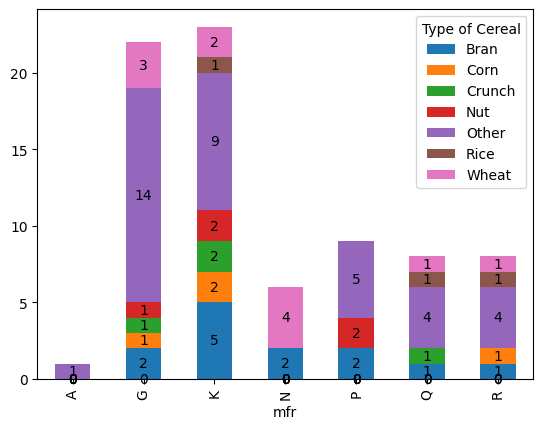

In [226]:
import matplotlib.pyplot as plt
manufacturer_category_counts = df.groupby(['mfr', 'Type of Cereal']).size().unstack().fillna(0)
ax= manufacturer_category_counts.plot(kind='bar', stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')
plt.plot()

Question 9

<AxesSubplot: xlabel='rating', ylabel='calories'>

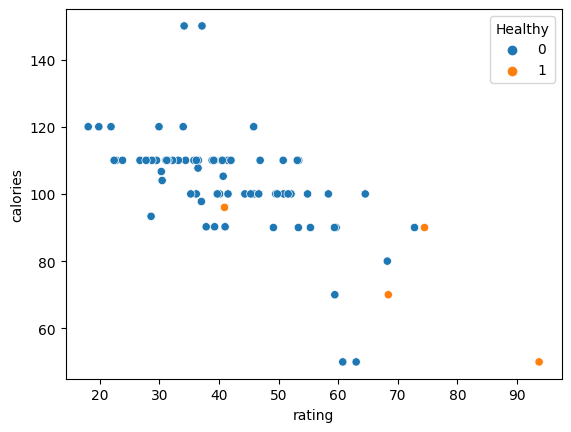

In [232]:
import seaborn as sns
sns.scatterplot(data=df, x='rating', y='calories', hue='Healthy')

Question 10

In [241]:
df[df['Healthy'] == 1]['shelf'].value_counts(ascending=False).head(1)

3    3
Name: shelf, dtype: int64

Question 11